In [42]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import warnings
import os
#from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [43]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [44]:
#os.chdir(r"D:\Data Backup\Nav\Work\2020\Learning\Python\Liner Regression")

In [45]:
# read the dataset
df = pd.read_csv('Data.csv')

In [46]:
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 200
Total number of columns in dataset = 4


In [47]:
df.head()

,Feature 1,Feature 2,Feature 3,Target
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
#There are 3 features, all of them are numeric. Target variable is continous , so its a regression problem.

In [49]:
target_col = "Target"

In [50]:
#X are feature variables and y is the target variable
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [55]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

# Linear Regression using scikit-Learn

In [57]:
model = LinearRegression()
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [58]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print(model.coef_)

[ 0.04576465  0.18853002 -0.00103749]


In [61]:
model.intercept_

2.9388893694594067

# Linear Regression using statsmodels

In [62]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [63]:
results = model.fit()
results.params

const        2.708949
Feature 1    0.044059
Feature 2    0.199287
Feature 3    0.006882
dtype: float64

In [16]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Target   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     434.5
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           1.88e-69
Time:                        14:38:53   Log-Likelihood:                -262.21
No. Observations:                 140   AIC:                             532.4
Df Residuals:                     136   BIC:                             544.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7089      0.374      7.250      0.0

## In Statistics the coefficient of determination that is denoted by R-squared is the proportion of variance in the dependent variable that is predictable from the independent variable.

In [17]:
X_test = sm.add_constant(X_test)

In [18]:
y_pred = results.predict(X_test)

In [19]:
residual = y_test - y_pred

# No Multicolinearity

In [20]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


# Normailty of Residual

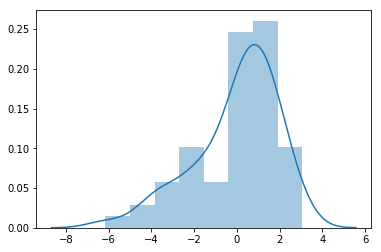

In [21]:
sns.distplot(residual)

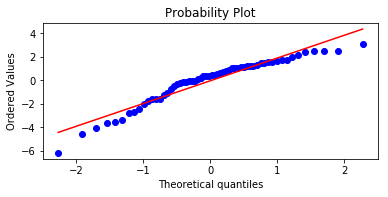

In [22]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [23]:
np.mean(residual)

-0.038488952534398074

# Homoscedasticity

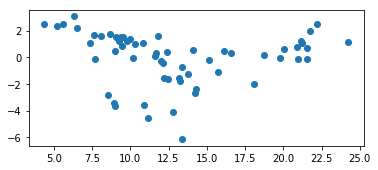

In [24]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# No autocorrelation of residuals

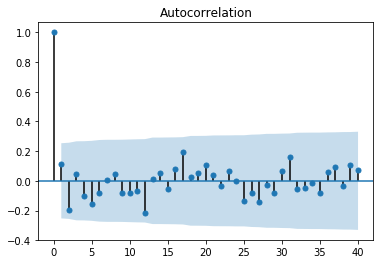

In [25]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()